# 01 - exploración.ipynb



# Proyecto 1 - Modelos de Sistemas  
### Universidad de Antioquia - Ingeniería de Sistemas (Modalidad Virtual)  

---

## Integrantes  
- **José David Henao Gallego**  
  *C.C. 1002205747*  

- **Juan Andrés Lema Tamayo**  
  *C.C. 1001233264*  

---


In [66]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

## 1. Sección para optención de dataset

En esta sección obtiene el dataset a traves del kaggle.json.


In [67]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


Descompresión e inspección de archivo

In [68]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


## 2. Cargar dataset  

En esta sección se carga el archivo **`train.csv`** y se crea el datraset inicial

In [69]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 21)


## 3. Vista rápida del dataset

En esta sección se muestran las primeras filas del dataset usando `z.head()`, lo que permite revisar rápidamente la estructura y los datos cargados.


In [70]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## 4. Selección de columnas relevantes

En esta sección se filtran las columnas del dataset para trabajar solo con `'F_EDUCACIONMADRE'`, `'E_VALORMATRICULAUNIVERSIDAD'` y `'RENDIMIENTO_GLOBAL'`. Luego, con `z.head()` se muestra una vista previa de estas columnas seleccionadas.

In [71]:
z = z[['F_EDUCACIONMADRE', 'E_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]
z.head()

,F_EDUCACIONMADRE,E_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,Postgrado,Entre 5.5 millones y menos de 7 millones,medio-alto
1,Técnica o tecnológica incompleta,Entre 2.5 millones y menos de 4 millones,bajo
2,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,bajo
3,Secundaria (Bachillerato) completa,Entre 4 millones y menos de 5.5 millones,alto
4,Primaria completa,Entre 2.5 millones y menos de 4 millones,medio-bajo


### 4.1. Visualización de la distribución de columnas

En esta sección se generan gráficos de barras para observar la distribución de los valores de `'F_EDUCACIONMADRE'` y `'E_VALORMATRICULAUNIVERSIDAD'` utilizando `value_counts().plot(kind='bar')`. Esto permite identificar rápidamente la frecuencia de cada categoría en estas columnas.


<Axes: xlabel='F_EDUCACIONMADRE'>

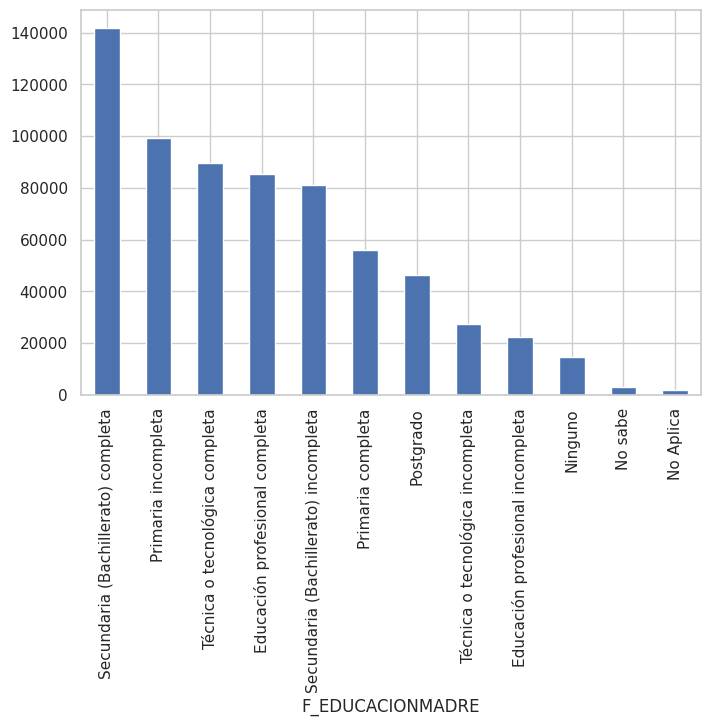

In [72]:
z.F_EDUCACIONMADRE.value_counts().plot(kind='bar')

<Axes: xlabel='E_VALORMATRICULAUNIVERSIDAD'>

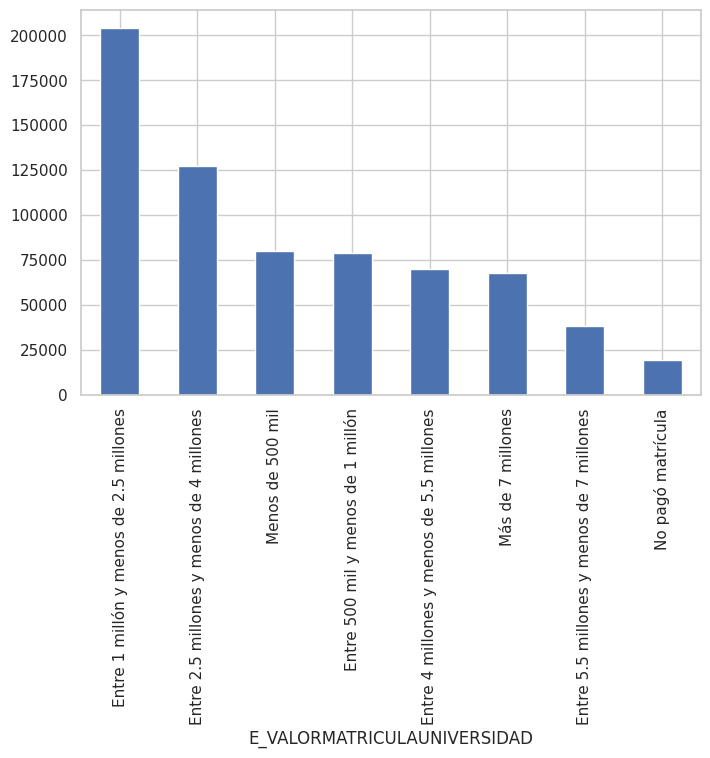

In [73]:
z.E_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

## 5. Análisis de distribución del rendimiento académico

En esta sección se analiza cómo se distribuye el `'RENDIMIENTO_GLOBAL'` en función de los diferentes valores de `'E_VALORMATRICULAUNIVERSIDAD'`.  
Se generan gráficos de barras para cada categoría de matrícula, mostrando la frecuencia de los niveles de rendimiento: `'bajo'`, `'medio-bajo'`, `'medio-alto'` y `'alto'`. Esto permite identificar patrones o tendencias entre el valor de matrícula y el desempeño académico.


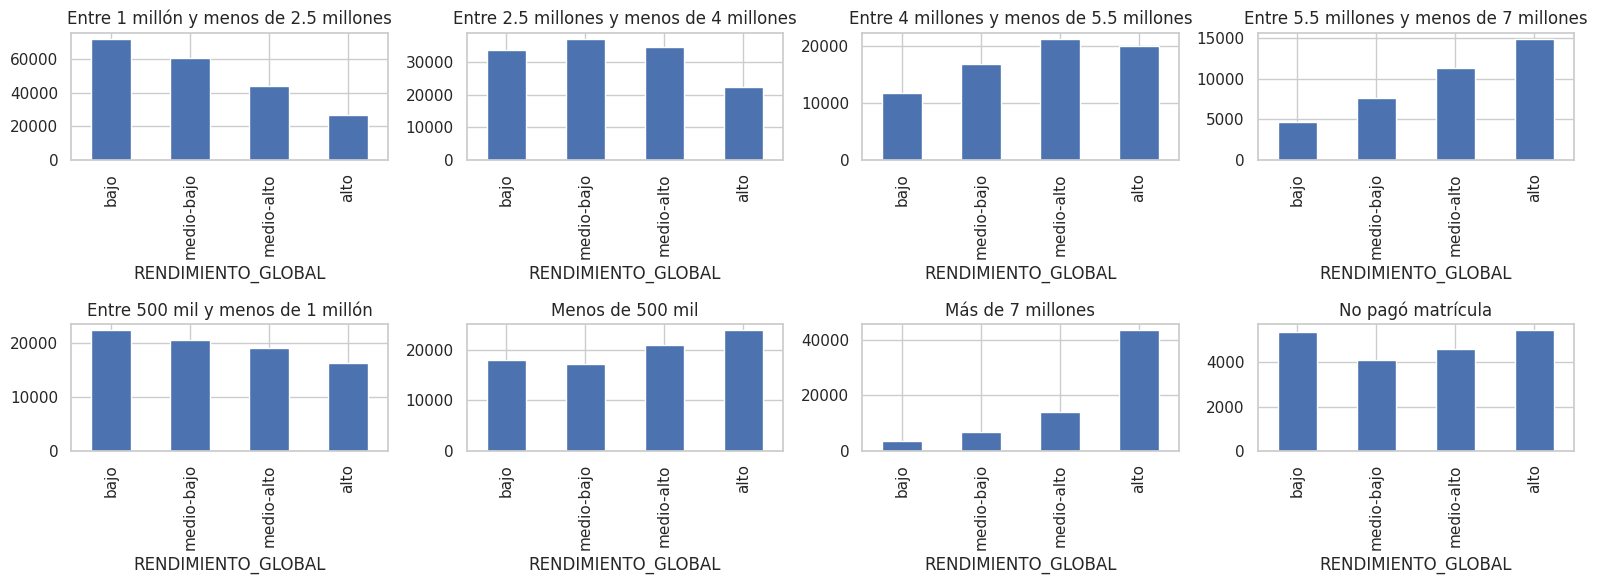

In [74]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.E_VALORMATRICULAUNIVERSIDAD.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.E_VALORMATRICULAUNIVERSIDAD==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

### 5.1. Distribución del rendimiento según educación de la madre

En esta sección se generan gráficos de barras para analizar cómo se distribuye `'RENDIMIENTO_GLOBAL'` según cada categoría de `'F_EDUCACIONMADRE'`.  
Se utiliza un bucle con `subplots()` de `rlxutils`, filtrando el dataset por cada nivel de educación de la madre y mostrando las frecuencias de `'bajo'`, `'medio-bajo'`, `'medio-alto'` y `'alto'`. Esto permite identificar posibles relaciones entre el nivel educativo de la madre y el desempeño académico.

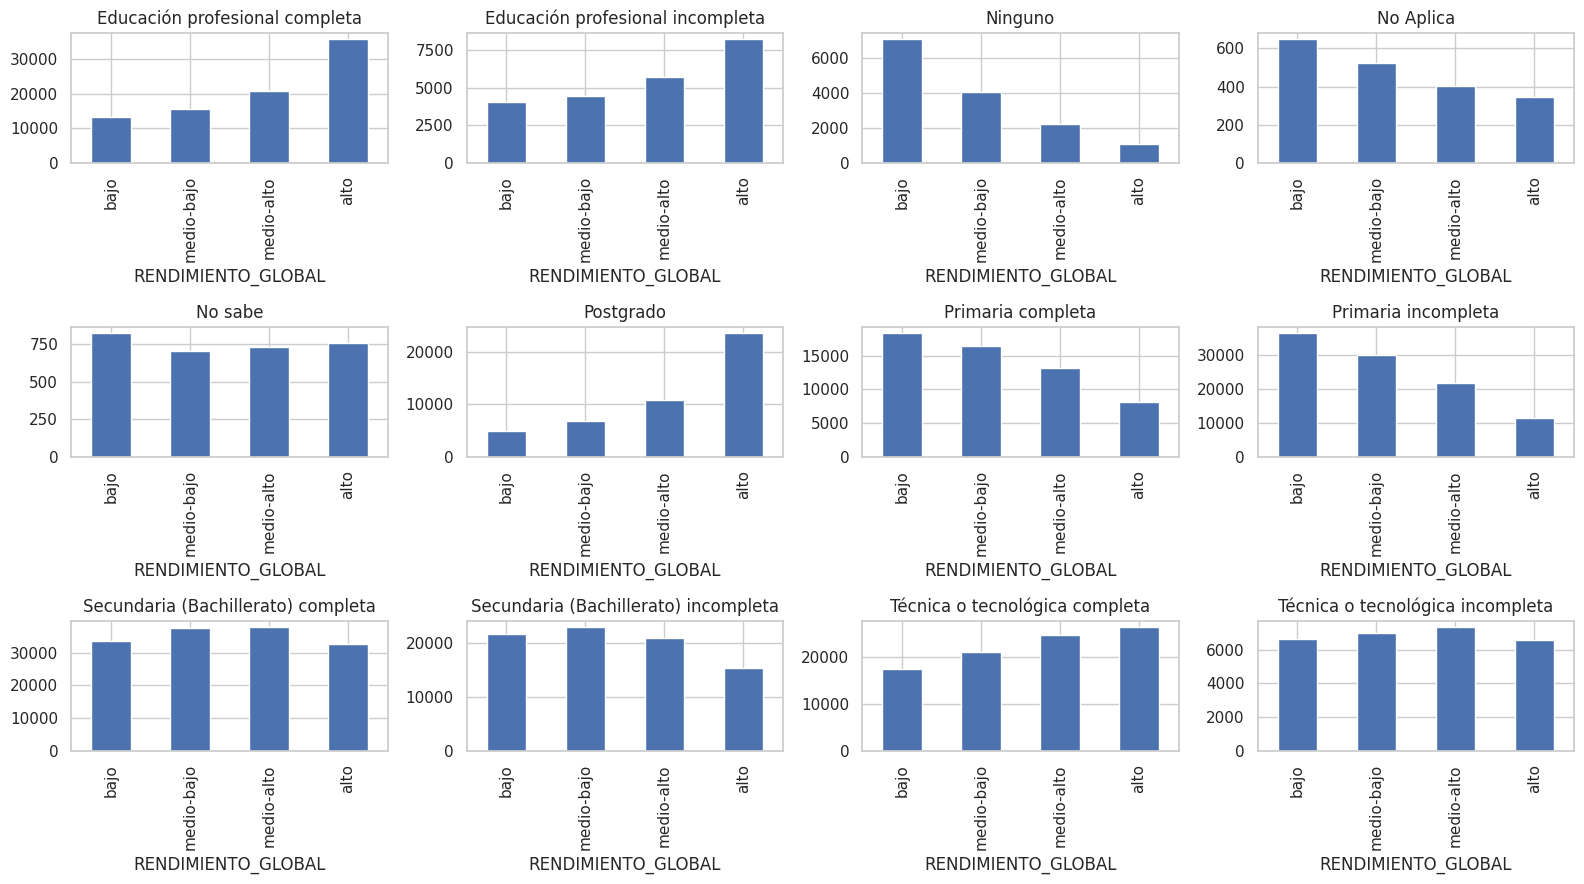

In [75]:
c = sorted(z.F_EDUCACIONMADRE.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.F_EDUCACIONMADRE==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

## 6. Revisión de valores faltantes

En esta sección se contabilizan los valores faltantes en las columnas `'F_EDUCACIONMADRE'` y `'E_VALORMATRICULAUNIVERSIDAD'` utilizando `isna()` y `sum()`.  
Esto permite identificar si existen datos incompletos que puedan afectar el análisis posterior.


In [76]:
sum(z.F_EDUCACIONMADRE.isna()), sum(z.E_VALORMATRICULAUNIVERSIDAD.isna())

(23664, 6287)

### 6.1. Reemplazo de valores faltantes

En esta sección se reemplazan los valores faltantes en `'F_EDUCACIONMADRE'` y `'E_VALORMATRICULAUNIVERSIDAD'` por `'no info'`.  
Luego se verifica nuevamente la cantidad de valores faltantes para asegurarse de que no queden datos incompletos que puedan afectar el análisis.

In [77]:
# Reemplazo de valores faltantes por 'no info'
z.F_EDUCACIONMADRE.values[z.F_EDUCACIONMADRE.isna()] = 'no info'
z.E_VALORMATRICULAUNIVERSIDAD.values[z.E_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'

# Verificación de valores faltantes
sum(z.F_EDUCACIONMADRE.isna()), sum(z.E_VALORMATRICULAUNIVERSIDAD.isna())


(0, 0)

### 6.2. Conversión de valores categóricos a numéricos

En esta sección se transforma la columna `'E_VALORMATRICULAUNIVERSIDAD'` de categorías textuales a valores numéricos según un mapa (`cmap`) definido previamente.  
Esto permite trabajar con los valores de matrícula de manera cuantitativa en análisis posteriores, como gráficos o estadísticas.  
Luego se verifica la distribución de los valores convertidos con `value_counts()`.


In [78]:
# Mapa de conversión de categorías a valores numéricos
cmap = {
    'Entre 1 millón y menos de 2.5 millones': 1.75,
    'Entre 2.5 millones y menos de 4 millones': 3.25,
    'Menos de 500 mil': 0.25,
    'Entre 500 mil y menos de 1 millón': 0.75,
    'Entre 4 millones y menos de 5.5 millones': 4.75,
    'Más de 7 millones': 7.75,
    'Entre 5.5 millones y menos de 7 millones': 6.25,
    'No pagó matrícula': 0,
    'no info': -1
}

# Aplicación del mapa para convertir la columna a valores numéricos
z.E_VALORMATRICULAUNIVERSIDAD = np.array([cmap[i] for i in z.E_VALORMATRICULAUNIVERSIDAD])

# Verificación de la distribución de los valores convertidos
z.E_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
E_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.00,19528
-1.00,6287


## 7. Limpieza de categorías en educación de la madre

En esta sección se reemplazan valores poco informativos o ambiguos en `'F_EDUCACIONMADRE'` (`'No sabe'` y `'No Aplica'`) por `'no info'`.  
Luego se verifica la distribución de las categorías limpias con `value_counts()` para asegurarse de que los datos estén consistentes.

In [79]:
# Creación de una copia del dataset para no afectar el original
z = z.copy()

# Reemplazo de categorías ambiguas por 'no info'
z.F_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in z.F_EDUCACIONMADRE.values]

# Verificación de la distribución de categorías
z.F_EDUCACIONMADRE.value_counts()

,count
F_EDUCACIONMADRE,
Secundaria (Bachillerato) completa,141744
Primaria incompleta,99420
Técnica o tecnológica completa,89542
Educación profesional completa,85326
Secundaria (Bachillerato) incompleta,81012
Primaria completa,56125
Postgrado,46246
no info,28599
Técnica o tecnológica incompleta,27533


### 7.1. Codificación one-hot de la educación de la madre

En esta sección se realiza una codificación one-hot de la columna `'F_EDUCACIONMADRE'`.  
Primero se obtienen los valores únicos y luego se asigna un vector binario para cada categoría usando `np.eye()`.  
Esto permite utilizar la información de educación de la madre como variables numéricas en modelos de machine learning.


In [80]:
# Obtención de los valores únicos
x = z.F_EDUCACIONMADRE.values
F_EDUCACIONMADRE_vals = sorted(np.unique(x))

# Creación de codificación one-hot
F_EDUCACIONMADRE_onehot_vals = {val: np.eye(len(F_EDUCACIONMADRE_vals))[i] for i, val in enumerate(F_EDUCACIONMADRE_vals)}

# Visualización del diccionario one-hot
F_EDUCACIONMADRE_onehot_vals


{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

### 7.2. Aplicación de la codificación one-hot

En esta sección se aplica la codificación one-hot creada previamente a cada fila de `'F_EDUCACIONMADRE'` en el dataset.  
Se construye un array donde cada categoría es representada por su vector binario correspondiente, listo para usarse en análisis o modelos de machine learning.


In [81]:
# Aplicación de la codificación one-hot al dataset
F_EDUCACIONMADRE_onehot_enc = np.array([F_EDUCACIONMADRE_onehot_vals[i] for i in z.F_EDUCACIONMADRE])

# Visualización del array resultante
F_EDUCACIONMADRE_onehot_enc


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

### 7.3. Conversión de la codificación one-hot a DataFrame

En esta sección se convierte el array de codificación one-hot de `'F_EDUCACIONMADRE'` en un DataFrame de pandas.  
Cada columna recibe un nombre descriptivo correspondiente a la categoría original, lo que facilita su integración con el dataset principal y su uso en análisis o modelos de machine learning.

In [82]:
# Conversión del array one-hot a DataFrame
F_EDUCACIONMADRE_df = pd.DataFrame(
    F_EDUCACIONMADRE_onehot_enc,
    columns=[f"F_EDUCACIONMADRE__{v}" for v in F_EDUCACIONMADRE_onehot_vals]
)

# Visualización del DataFrame resultante
F_EDUCACIONMADRE_df


,F_EDUCACIONMADRE__Educación profesional completa,F_EDUCACIONMADRE__Educación profesional incompleta,F_EDUCACIONMADRE__Ninguno,F_EDUCACIONMADRE__Postgrado,F_EDUCACIONMADRE__Primaria completa,F_EDUCACIONMADRE__Primaria incompleta,F_EDUCACIONMADRE__Secundaria (Bachillerato) completa,F_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE__Técnica o tecnológica completa,F_EDUCACIONMADRE__Técnica o tecnológica incompleta,F_EDUCACIONMADRE__no info
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 7.4. Integración de la codificación one-hot al dataset

En esta sección se concatena el DataFrame de codificación one-hot de `'F_EDUCACIONMADRE'` con el dataset original.  
Luego se elimina la columna original `'F_EDUCACIONMADRE'`, dejando solo las columnas codificadas, listas para análisis o modelos de machine learning.  
Se verifica la nueva forma del dataset con `z.shape`.


In [83]:
# Integración del DataFrame one-hot al dataset original y eliminación de la columna original
z = pd.concat([F_EDUCACIONMADRE_df, z], axis=1).drop('F_EDUCACIONMADRE', axis=1)

# Verificación de la nueva forma del dataset
z.shape

z.head()


,F_EDUCACIONMADRE__Educación profesional completa,F_EDUCACIONMADRE__Educación profesional incompleta,F_EDUCACIONMADRE__Ninguno,F_EDUCACIONMADRE__Postgrado,F_EDUCACIONMADRE__Primaria completa,F_EDUCACIONMADRE__Primaria incompleta,F_EDUCACIONMADRE__Secundaria (Bachillerato) completa,F_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE__Técnica o tecnológica completa,F_EDUCACIONMADRE__Técnica o tecnológica incompleta,F_EDUCACIONMADRE__no info,E_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.25,medio-alto
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.25,bajo
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.25,bajo
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.75,alto
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25,medio-bajo


## 8. Codificación numérica del rendimiento académico

En esta sección se convierte la columna `'RENDIMIENTO_GLOBAL'` de categorías textuales a valores numéricos utilizando un mapa (`rmap`) definido previamente: `'bajo'` → 0, `'medio-bajo'` → 1, `'medio-alto'` → 2, `'alto'` → 3.  
Esto permite usar la columna como variable dependiente en análisis cuantitativos o modelos de machine learning.  
Se muestra una vista previa del dataset con `z.head()`.


In [84]:
# Definición del nombre de la columna objetivo
y_col = 'RENDIMIENTO_GLOBAL'

# Mapa de conversión de categorías a valores numéricos
rmap = {'alto': 3, 'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2}

# Aplicación del mapa a la columna objetivo
z[y_col] = [rmap[i] for i in z[y_col]]

# Vista previa del dataset
z.head()


,F_EDUCACIONMADRE__Educación profesional completa,F_EDUCACIONMADRE__Educación profesional incompleta,F_EDUCACIONMADRE__Ninguno,F_EDUCACIONMADRE__Postgrado,F_EDUCACIONMADRE__Primaria completa,F_EDUCACIONMADRE__Primaria incompleta,F_EDUCACIONMADRE__Secundaria (Bachillerato) completa,F_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE__Técnica o tecnológica completa,F_EDUCACIONMADRE__Técnica o tecnológica incompleta,F_EDUCACIONMADRE__no info,E_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.25,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.25,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.25,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.75,3
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25,1


## 9. Preparación de features y variable objetivo

En esta sección se ordenan las columnas del dataset y se separan las features (`X`) de la variable objetivo (`y`).  
`X` contiene todas las columnas excepto `'RENDIMIENTO_GLOBAL'` y `y` contiene los valores codificados de `'RENDIMIENTO_GLOBAL'`.  
Se verifica la forma de ambos arrays con `X.shape` y `y.shape` para asegurarse de que la separación se realizó correctamente.

In [85]:
# Ordenamiento de columnas
z = z[sorted(z.columns)]

# Separación de features y variable objetivo
X = z[[c for c in z.columns if c != y_col]].values
y = z[y_col].values

# Verificación de la forma de los arrays
X.shape, y.shape


((692500, 12), (692500,))

## 10. División del dataset en entrenamiento y prueba

En esta sección se divide el dataset en conjuntos de entrenamiento y prueba utilizando `train_test_split` de `scikit-learn`.  
Se reserva el 80 % de los datos para entrenamiento (`Xtr`, `ytr`) y el 20 % restante para prueba (`Xts`, `yts`).  
Se verifica la forma de cada conjunto con `Xtr.shape`, `Xts.shape`, `ytr.shape` y `yts.shape` para asegurarse de que la división se realizó correctamente.


In [86]:
from sklearn.model_selection import train_test_split

# División del dataset en entrenamiento y prueba (80% - 20%)
Xtr, Xts, ytr, yts = train_test_split(X, y, train_size=0.8)

# Verificación de la forma de los conjuntos resultantes
Xtr.shape, Xts.shape, ytr.shape, yts.shape


((554000, 12), (138500, 12), (554000,), (138500,))

## 11. Entrenamiento del modelo de regresión logística

En esta sección se crea un modelo de regresión logística usando `LogisticRegression` de `scikit-learn` y se entrena con el conjunto de entrenamiento (`Xtr`, `ytr`).  
Esto permite ajustar el modelo a los datos para posteriormente realizar predicciones sobre el conjunto de prueba o nuevos datos.


In [87]:
from sklearn.linear_model import LogisticRegression

# Creación del modelo de regresión logística
lr = LogisticRegression()

# Entrenamiento del modelo con los datos de entrenamiento
lr.fit(Xtr, ytr)


LogisticRegression()

## 12. Predicciones del modelo

En esta sección se utilizan los datos de entrenamiento y prueba para generar predicciones con el modelo de regresión logística entrenado.  
Se obtienen `preds_tr` para el conjunto de entrenamiento y `preds_ts` para el conjunto de prueba.  
Se muestran las primeras 10 predicciones de cada conjunto para una inspección rápida.

In [88]:
# Generación de predicciones con el modelo entrenado
preds_tr = lr.predict(Xtr)
preds_ts = lr.predict(Xts)

# Visualización de las primeras 10 predicciones de cada conjunto
print(preds_tr[:10])
print(preds_ts[:10])


[0 1 0 1 3 2 1 3 3 0]
[0 0 0 0 0 3 0 3 3 3]


## 13. Evaluación del modelo

En esta sección se evalúa el desempeño del modelo de regresión logística.  
Primero se calcula la precisión (`accuracy`) en los conjuntos de entrenamiento y prueba con `np.mean(preds==y)`.  
Luego se genera la matriz de confusión (`confusion_matrix`) para ambos conjuntos y se normaliza por clase, permitiendo observar la proporción de predicciones correctas por categoría.  
Finalmente, se visualizan las matrices de confusión usando `seaborn.heatmap` para una interpretación más clara de los resultados.


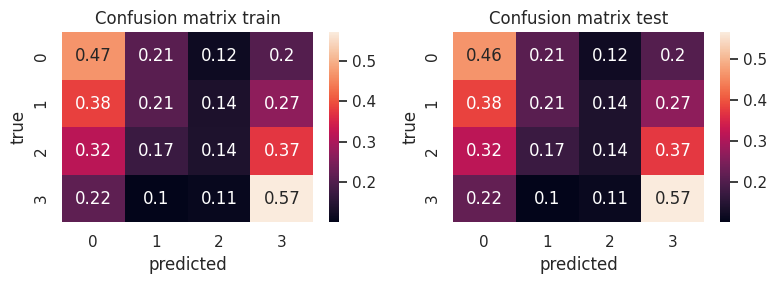

In [89]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from rlxutils import subplots

# Cálculo de la precisión en entrenamiento y prueba
np.mean(preds_tr == ytr), np.mean(preds_ts == yts)

# Generación de matrices de confusión
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# Normalización por clase
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1, 1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1, 1)

# Visualización de las matrices de confusión
for ax, i in subplots(2, usizex=4):
    if i == 0:
        sns.heatmap(cm_tr, annot=True)
        plt.title("Confusion matrix train")
    if i == 1:
        sns.heatmap(cm_ts, annot=True)
        plt.title("Confusion matrix test")
    plt.ylabel("true")
    plt.xlabel("predicted")


## 14. Modelo usando únicamente el valor de matrícula

En esta sección se realiza un análisis similar al modelo completo, pero utilizando únicamente la columna `'E_VALORMATRICULAUNIVERSIDAD'` como feature.  
Se separan las features y la variable objetivo, se dividen los datos en conjuntos de entrenamiento y prueba (80 %-20 %), y se entrena un modelo de regresión logística (`lr_small`).  
Se generan predicciones para ambos conjuntos y se calcula la precisión (`accuracy`).  
Finalmente, se crean y normalizan las matrices de confusión, que se visualizan con `seaborn.heatmap` para evaluar cómo el rendimiento académico puede predecirse usando solo el valor de matrícula.


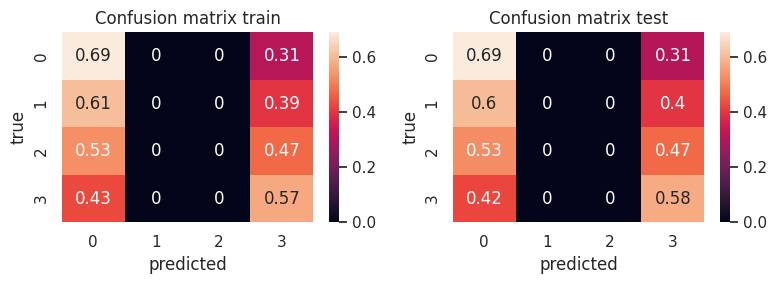

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from rlxutils import subplots

# Selección de la columna de interés y la variable objetivo
zh = z[['E_VALORMATRICULAUNIVERSIDAD', y_col]]

# Separación de features y variable objetivo
X = zh[[c for c in zh.columns if c != y_col]].values
y = zh[y_col].values
X.shape, y.shape

# División del dataset y entrenamiento del modelo pequeño
Xtr, Xts, ytr, yts = train_test_split(X, y, train_size=0.8)
lr_small = LogisticRegression()
lr_small.fit(Xtr, ytr)

# Predicciones
preds_tr = lr_small.predict(Xtr)
preds_ts = lr_small.predict(Xts)

# Precisión
np.mean(preds_tr == ytr), np.mean(preds_ts == yts)

# Matrices de confusión
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# Normalización por clase
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1, 1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1, 1)

# Visualización de las matrices de confusión
for ax, i in subplots(2, usizex=4):
    if i == 0:
        sns.heatmap(cm_tr, annot=True)
        plt.title("Confusion matrix train")
    if i == 1:
        sns.heatmap(cm_ts, annot=True)
        plt.title("Confusion matrix test")
    plt.ylabel("true")
    plt.xlabel("predicted")


## 15. Preparación del dataset de prueba

En esta sección se carga el dataset de prueba desde un archivo CSV (`test.csv`) y se seleccionan las columnas necesarias (`'FAMI_EDUCACIONMADRE'` y `'E_VALORMATRICULAUNIVERSIDAD'`).  
Se manejan los valores faltantes reemplazándolos por `'no info'`.  
La columna `'E_VALORMATRICULAUNIVERSIDAD'` se convierte a valores numéricos usando el mapa definido previamente (`cmap`).  
Se limpian las categorías ambiguas en `'F_EDUCACIONMADRE'` y se aplica la codificación one-hot usando los vectores definidos previamente (`F_EDUCACIONMADRE_onehot_vals`).  
Finalmente, se concatena la codificación one-hot al dataset de prueba y se elimina la columna original, dejando `zt` listo para predicciones.


In [91]:
# Carga del dataset de prueba
zt = pd.read_csv("test.csv")
zt_ids = zt['ID'].values
zt = zt[['F_EDUCACIONMADRE', 'E_VALORMATRICULAUNIVERSIDAD']]
print("Shape of loaded dataframe:", zt.shape)
zt.head()

# Reemplazo de valores faltantes por 'no info'
zt.F_EDUCACIONMADRE.values[zt.F_EDUCACIONMADRE.isna()] = 'no info'
zt.E_VALORMATRICULAUNIVERSIDAD.values[zt.E_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'

# Conversión de matrícula a valores numéricos
zt = zt.copy()
zt.E_VALORMATRICULAUNIVERSIDAD = np.array([cmap[i] for i in zt.E_VALORMATRICULAUNIVERSIDAD])

# Limpieza de categorías ambiguas en educación de la madre
zt.F_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt.F_EDUCACIONMADRE.values]

# Codificación one-hot de educación de la madre
F_EDUCACIONMADRE_onehot_enc = np.array([F_EDUCACIONMADRE_onehot_vals[i] for i in zt.F_EDUCACIONMADRE])
F_EDUCACIONMADRE_df = pd.DataFrame(F_EDUCACIONMADRE_onehot_enc, columns=[f"F_EDUCACIONMADRE__{v}" for v in F_EDUCACIONMADRE_onehot_vals])

# Integración del one-hot al dataset de prueba y eliminación de la columna original
zt = pd.concat([F_EDUCACIONMADRE_df, zt], axis=1).drop('F_EDUCACIONMADRE', axis=1)
zt.shape

# Vista final del dataset de prueba
zt

Shape of loaded dataframe: (296786, 2)


,F_EDUCACIONMADRE__Educación profesional completa,F_EDUCACIONMADRE__Educación profesional incompleta,F_EDUCACIONMADRE__Ninguno,F_EDUCACIONMADRE__Postgrado,F_EDUCACIONMADRE__Primaria completa,F_EDUCACIONMADRE__Primaria incompleta,F_EDUCACIONMADRE__Secundaria (Bachillerato) completa,F_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE__Técnica o tecnológica completa,F_EDUCACIONMADRE__Técnica o tecnológica incompleta,F_EDUCACIONMADRE__no info,E_VALORMATRICULAUNIVERSIDAD
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.25
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.75
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.75
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...
296781,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.25
296782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.75
296783,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25
296784,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.25


## 16. Predicciones sobre el dataset de prueba

En esta sección se preparan los datos de prueba (`zt`) ordenando las columnas de forma consistente con el modelo entrenado.  
Se generan las predicciones del modelo de regresión logística (`lr`) sobre estos datos, almacenadas en `preds_test_data`.  
Esto permite obtener el rendimiento académico estimado para cada fila del dataset de prueba.


In [92]:
# Preparación del array de features de prueba
X_test_data = zt[sorted(zt.columns)].values
X_test_data.shape

# Generación de predicciones con el modelo entrenado
preds_test_data = lr.predict(X_test_data)


## 17. Creación del archivo de submission

En esta sección se realiza el mapeo inverso de las predicciones numéricas a categorías textuales utilizando `rmapi`.  
Se construye un DataFrame con los IDs del dataset de prueba y las predicciones correspondientes (`RENDIMIENTO_GLOBAL`).  
Finalmente, se guarda o envía el archivo `my_submission.csv` para la competencia en Kaggle.  

Se incluyen sugerencias para mejorar el modelo, como probar otros algoritmos (SVM, Random Forest, Gaussian, etc.), ajustar hiperparámetros, explorar diferentes métodos de preprocesamiento, crear nuevas columnas a partir de operaciones entre columnas existentes o integrar datos externos (por ejemplo, información económica por departamento y año).


In [93]:
import pandas as pd

# Mapeo inverso de predicciones a etiquetas textuales
rmapi = {v: k for k, v in rmap.items()}
text_preds_test_data = [rmapi[i] for i in preds_test_data]

# Creación del DataFrame de submission
submission = pd.DataFrame([zt_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T

# Guardado a CSV
submission.to_csv("my_submission.csv", index=False)

# Vista previa
submission.head()
submission.shape

(296786, 2)

In [94]:

# Comando para enviar el archivo a la competencia Kaggle
!kaggle competitions submit -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia \
-f my_submission.csv -m "raul ramos submission with linear model"

100% 3.87M/3.87M [00:00<00:00, 13.7MB/s]
Successfully submitted to UDEA/ai4eng 20252 - Pruebas Saber Pro Colombia